Подключили библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузили данные и посмотрели несколько строк

In [ ]:
data = pd.read_csv("/content/kicksharing.csv") # датасет номер 9(поездки на самокатах)
data.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


Выведем тепловую карту на случай, если есть пропущенные значения по столбцам

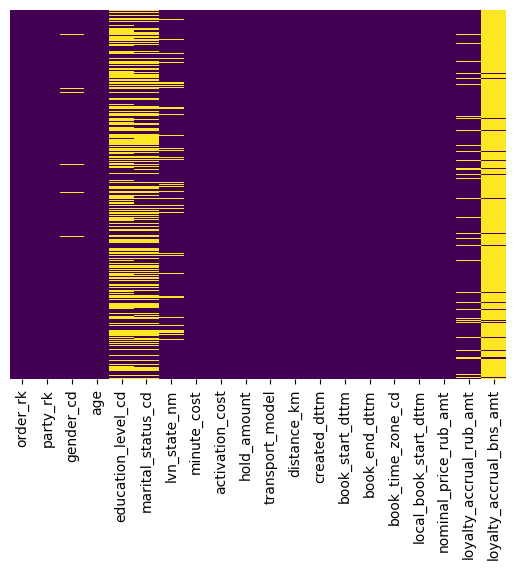

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

**Вывод:** Много NaN данных в столбцах education_level_cd, marital_status_cd.

Почти все NaN данные в столбцеl loyalty_accrual_bns_amt

Взяли основную информацию о количестве строк и типах данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

**Удалили столбец с NaN данными**

In [ ]:
data.drop('loyalty_accrual_bns_amt',axis=1,inplace=True)

In [ ]:
data.describe().round(2)

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt
count,3.967490e+05,3.967490e+05,396749.00,396749.00,396749.00,396749.00,396749.00,396749.00,396749.00,366992.00
mean,2.892236e+08,5.988426e+08,31.54,7.29,42.59,299.98,3.68,3.54,127.65,37.52
std,3.813458e+07,3.311675e+08,9.43,1.29,11.99,1.94,141.86,1.21,100.12,75.21
min,2.526112e+08,1.471700e+04,12.00,1.50,0.00,80.00,0.00,0.00,0.00,-161.94
25%,2.618150e+08,2.962323e+08,24.00,6.49,30.00,300.00,0.94,3.00,80.84,11.24
50%,2.704367e+08,6.110092e+08,31.00,7.49,50.00,300.00,1.73,3.00,103.94,18.73
75%,3.432678e+08,8.646921e+08,37.00,8.22,50.00,300.00,3.06,3.00,142.10,35.06
max,3.562528e+08,1.301075e+09,94.00,19.99,50.00,500.00,56012.64,12.00,5627.64,3185.00


**Главные выводы:**
Средний возраст человека, использующего самокат - 31 год

Минимальный возвраст - 12 лет, максимальный - 94 года.

Средняя стоимость поездки 128 рублей.

Средний размер выплаченного кэшбека - 37 рублей

Средний километраж поездки на самокате - 4 км




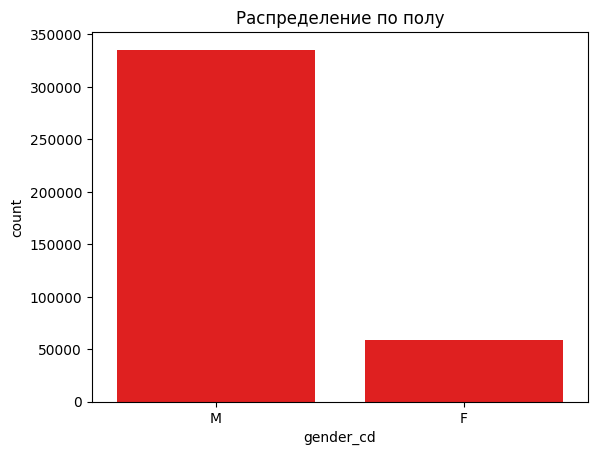

In [ ]:
sns.countplot(data, x='gender_cd', color='red')
plt.title("Распределение по полу");

**Вывод:** Мужчин больше чем в 4 раза, чем девушек

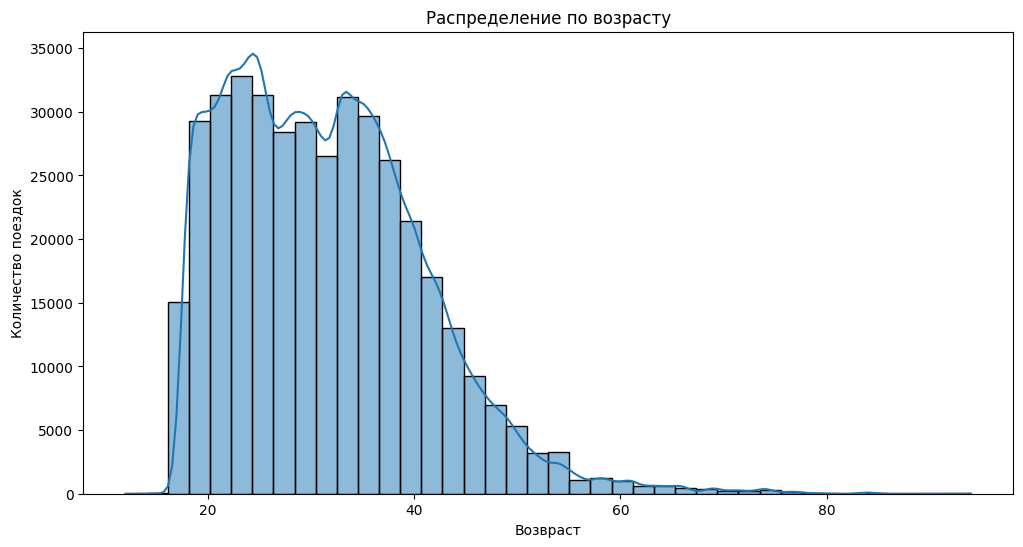

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel("Возвраст")
plt.ylabel("Количество поездок")
sns.histplot(data, x='age', bins=40, kde=True)
plt.title("Распределение по возрасту");

**Вывод:** Основная аудитория самокатов в прокат - люди 18-38 лет

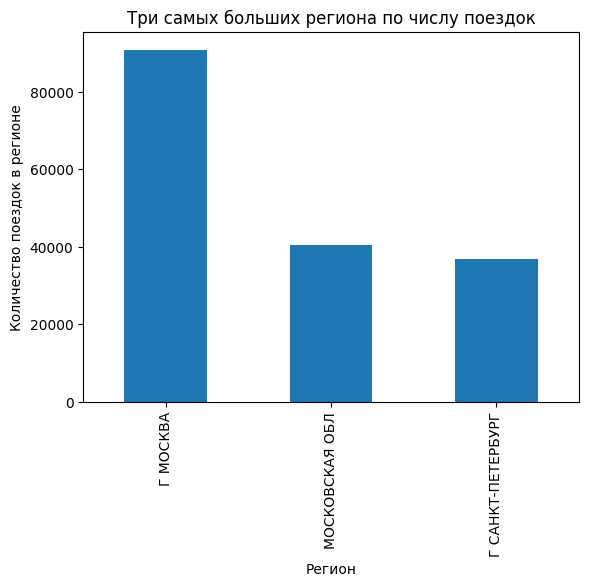

In [ ]:
top_regions = data['lvn_state_nm'].value_counts().head(3)
top_regions.plot(kind='bar', xlabel='Регион', ylabel='Количество поездок в регионе', title="Три самых больших региона по числу поездок");

**Вывод:** Больше всего поездок на самокате приходится на Москву и Московскую область, следом идет Санкт-Петербург.